## 0. Get data
To run the code behind, the data location is in: Modeling_Semantic_Plausibility/Data/pap, Modeling_Semantic_Plausibility/Data/pep-3k

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from data_analysis_compare import DataAnalysisCompare

In [2]:
def get_filepath(name,classnum_name,file_name):
    '''
    param name: name of the dataset, pep-3k or pap
    param classnum_name: for pap dataset, binary or multiclass
    param file_name: dev, test, train
    return: the str of apath of the file
    '''
    current_dir =os.path.realpath(".")
    parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
    if name=='pap':
        filepath=os.path.abspath(os.path.join(parent_dir,'Data',name,'train-dev-test-split-filtered',classnum_name,file_name+'.csv'))
    else:
        filepath=os.path.abspath(os.path.join(parent_dir,'Data',name,'train-dev-test-split',classnum_name,file_name+'.csv'))
    return filepath



## 1. basic analysis

In [3]:
filepath1=get_filepath('pap','binary','train')
filepath2=get_filepath('pap','binary','dev')
filepath3=get_filepath('pap','binary','test')
filepath4=get_filepath('pep-3k','','train')
filepath5=get_filepath('pep-3k','','dev')
filepath6=get_filepath('pep-3k','','test')

In [4]:
data_set1=DataAnalysisCompare(filepath1)
data_set2=DataAnalysisCompare(filepath2)
data_set3=DataAnalysisCompare(filepath3)
data_set4=DataAnalysisCompare(filepath4)
data_set5=DataAnalysisCompare(filepath5)
data_set6=DataAnalysisCompare(filepath6)

get file from: /home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data/pap/train-dev-test-split-filtered/binary/train.csv
get file from: /home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data/pap/train-dev-test-split-filtered/binary/dev.csv
get file from: /home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data/pap/train-dev-test-split-filtered/binary/test.csv
get file from: /home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data/pep-3k/train-dev-test-split/train.csv
get file from: /home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data/pep-3k/train-dev-test-split/dev.csv
get file from: /home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data/pep-3k/train-dev-test-split/test.csv


In [5]:
data_set_com1=DataAnalysisCompare(filepath1,filepath2,filepath3)
data_set_com2=DataAnalysisCompare(filepath4,filepath5,filepath6)

get file from: /home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data/pap/train-dev-test-split-filtered/binary/train.csv
get file from: /home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data/pap/train-dev-test-split-filtered/binary/dev.csv
get file from: /home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data/pap/train-dev-test-split-filtered/binary/test.csv
get file from: /home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data/pep-3k/train-dev-test-split/train.csv
get file from: /home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data/pep-3k/train-dev-test-split/dev.csv
get file from: /home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data/pep-3k/train-dev-test-split/test.csv


In [6]:
print('pap:number of rows and columns, number of classes')
print('train:',data_set1.dataset_statistics,data_set1.classes_num)
print('dev:',data_set2.dataset_statistics, data_set2.classes_num)
print('test:',data_set3.dataset_statistics, data_set3.classes_num)
print('total:',data_set_com1.dataset_statistics, data_set_com1.classes_num)
print('pep_3k:number of rows and columns, number of classes')
print('train:',data_set4.dataset_statistics, data_set4.classes_num)
print('dev:',data_set5.dataset_statistics, data_set5.classes_num)
print('test:',data_set6.dataset_statistics, data_set6.classes_num)
print('total:',data_set_com2.dataset_statistics, data_set_com2.classes_num)

pap:number of rows and columns, number of classes
train: [1386, 2] {'0': 696, '1': 690}
dev: [173, 2] {'0': 91, '1': 82}
test: [174, 2] {'0': 79, '1': 95}
total: [1733, 2] {'0': 866, '1': 867}
pep_3k:number of rows and columns, number of classes
train: [2449, 2] {'0': 1227, '1': 1222}
dev: [306, 2] {'0': 153, '1': 153}
test: [307, 2] {'0': 154, '1': 153}
total: [3062, 2] {'0': 1534, '1': 1528}


# 2. tokens analysis (word counts)

In [7]:
print('pap:total_tokens, num_unique_tokens')
print('train:',len(data_set1.all_tokens),data_set1.num_unique_tokens)
print('dev:',len(data_set2.all_tokens),data_set2.num_unique_tokens)
print('test:',len(data_set3.all_tokens),data_set3.num_unique_tokens)
print('total:',len(data_set_com1.all_tokens),data_set_com1.num_unique_tokens)
print('pep_3k:total_tokens,num_unique_tokens')
print('train:',len(data_set4.all_tokens),data_set4.num_unique_tokens)
print('dev:',len(data_set5.all_tokens),data_set5.num_unique_tokens)
print('test:',len(data_set6.all_tokens),data_set6.num_unique_tokens)
print('total:',len(data_set_com2.all_tokens),data_set_com2.num_unique_tokens)

pap:total_tokens, num_unique_tokens
train: 4158 2120
dev: 519 456
test: 522 446
total: 5199 2399
pep_3k:total_tokens,num_unique_tokens
train: 7347 561
dev: 918 330
test: 921 315
total: 9186 584


## 2.1 tokens number

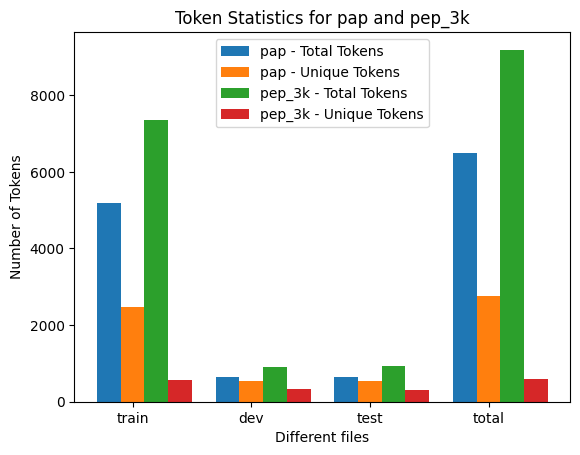

In [8]:
# Draw the bar chart for token statistics
# Data for pap
pap_data = {
    'train': {'total_tokens': 5184, 'num_unique_tokens': 2460},
    'dev': {'total_tokens': 648, 'num_unique_tokens': 553},
    'test': {'total_tokens': 648, 'num_unique_tokens': 544},
    'total': {'total_tokens': 6480, 'num_unique_tokens': 2749}
}

# Data for pep_3k
pep_3k_data = {
    'train': {'total_tokens': 7347, 'num_unique_tokens': 561},
    'dev': {'total_tokens': 918, 'num_unique_tokens': 330},
    'test': {'total_tokens': 921, 'num_unique_tokens': 315},
    'total': {'total_tokens': 9186, 'num_unique_tokens': 584}
}

categories = list(pap_data.keys())
pap_total_tokens = [pap_data[category]['total_tokens'] for category in categories]
pap_unique_tokens = [pap_data[category]['num_unique_tokens'] for category in categories]

pep_3k_total_tokens = [pep_3k_data[category]['total_tokens'] for category in categories]
pep_3k_unique_tokens = [pep_3k_data[category]['num_unique_tokens'] for category in categories]

bar_width = 0.20
index = np.arange(len(categories))

fig, ax = plt.subplots()

bar1 = ax.bar(index - bar_width, pap_total_tokens, bar_width, label='pap - Total Tokens')
bar2 = ax.bar(index , pap_unique_tokens, bar_width, label='pap - Unique Tokens')

bar3 = ax.bar(index+bar_width/2, pep_3k_total_tokens, bar_width, label='pep_3k - Total Tokens', align='edge')
bar4 = ax.bar(index + bar_width*1.5, pep_3k_unique_tokens, bar_width, label='pep_3k - Unique Tokens', align='edge')

ax.set_xlabel('Different files')
ax.set_ylabel('Number of Tokens')
ax.set_title('Token Statistics for pap and pep_3k')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


###
The total number of tokens of pap is less than the training set of pep-3k, but the number of unique tokens of pap is more than that of pep-3k.  

It shows that there are more repeated words in pep-3k.

## 2.2 tokens_pairs

pap:number of token pairs


/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data_analysis/data_analysis_compare.py:255: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(top_5_s_v.keys(), rotation=45, ha='right')
/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data_analysis/data_analysis_compare.py:261: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(top_5_v_o.keys(), rotation=45, ha='right')


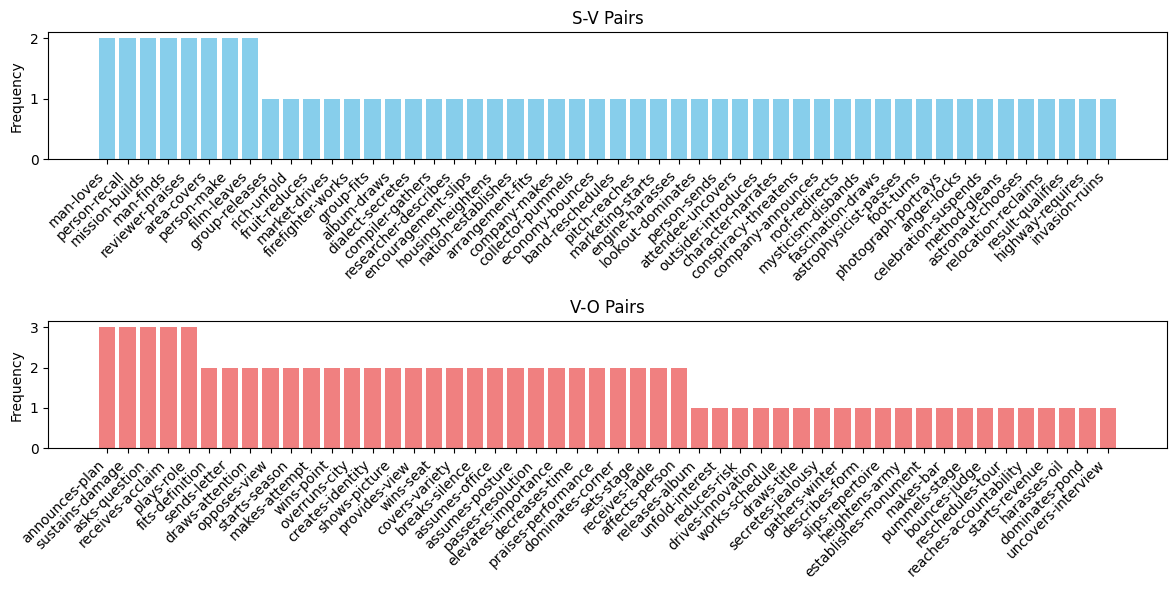

pep3k:number of token pairs


/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data_analysis/data_analysis_compare.py:255: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(top_5_s_v.keys(), rotation=45, ha='right')
/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data_analysis/data_analysis_compare.py:261: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(top_5_v_o.keys(), rotation=45, ha='right')


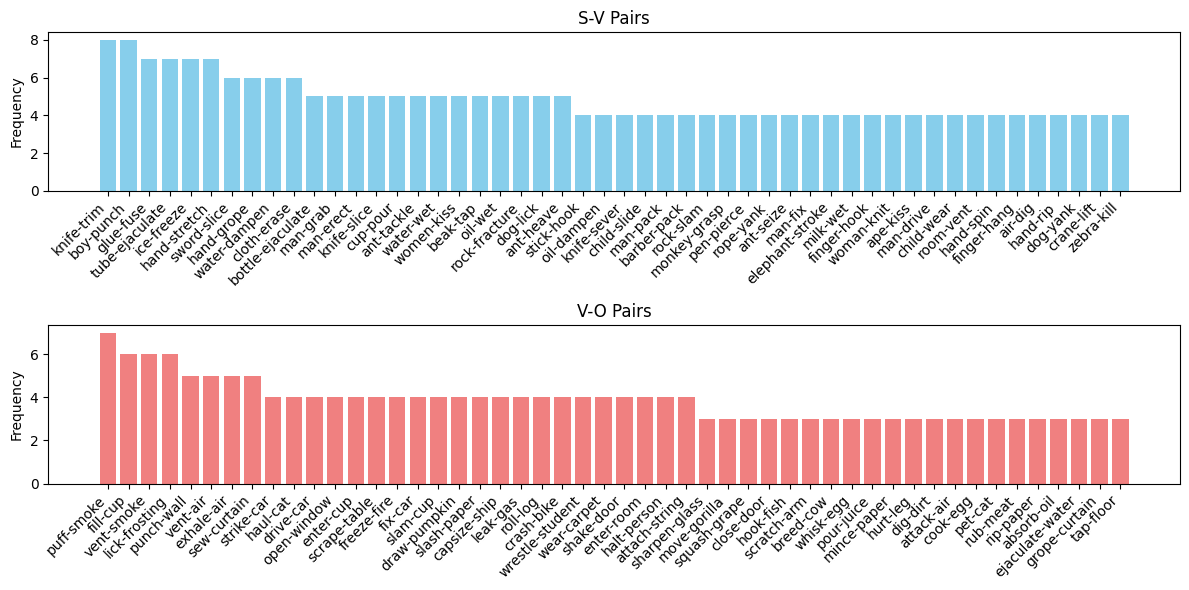

In [9]:
print('pap:number of token pairs')
data_set1.plot_tokens_bi_distribution(50)
print('pep3k:number of token pairs')
data_set4.plot_tokens_bi_distribution(50)

pap:number of token pairs


/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data_analysis/data_analysis_compare.py:255: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(top_5_s_v.keys(), rotation=45, ha='right')
/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data_analysis/data_analysis_compare.py:261: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(top_5_v_o.keys(), rotation=45, ha='right')


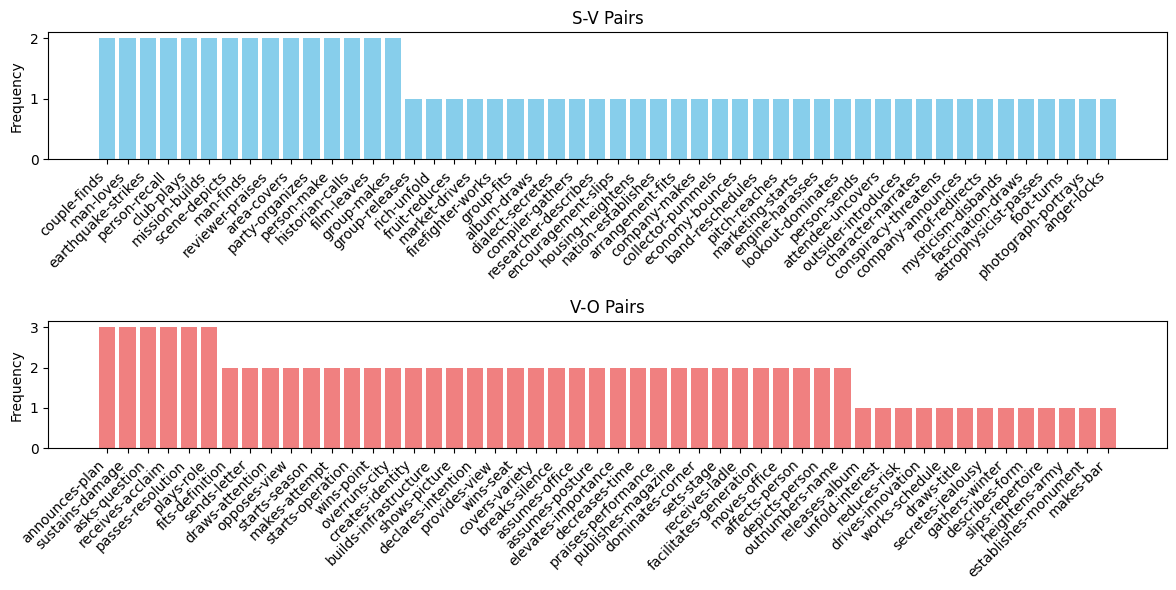

pep3k:number of token pairs


/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data_analysis/data_analysis_compare.py:255: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(top_5_s_v.keys(), rotation=45, ha='right')
/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data_analysis/data_analysis_compare.py:261: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(top_5_v_o.keys(), rotation=45, ha='right')


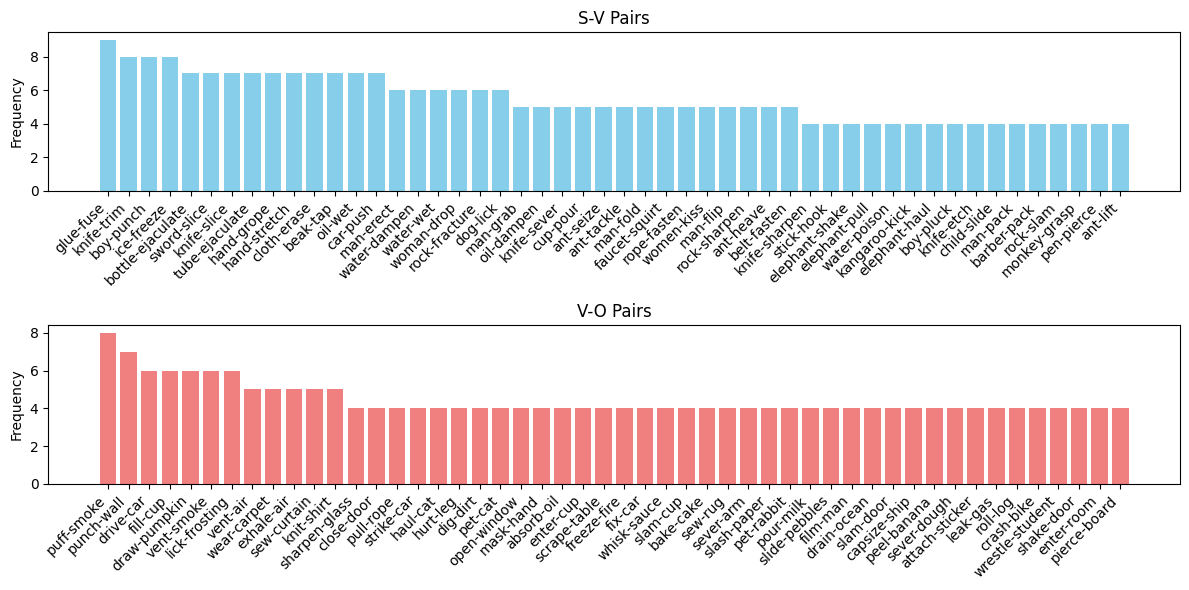

In [10]:
print('pap:number of token pairs')
data_set_com1.plot_tokens_bi_distribution(50)
print('pep3k:number of token pairs')
data_set_com2.plot_tokens_bi_distribution(50)

# 3.POS analysis

## 3.1 unigram pos

In [11]:
print('pap:unique_pos')
print(len(data_set1.unique_pos)) #18
print(len(data_set2.unique_pos)) #12
print(len(data_set3.unique_pos)) #12
print(len(data_set_com1.unique_pos))
print('pep_3k:unique_pos')
print(len(data_set4.unique_pos)) #17
print(len(data_set5.unique_pos)) #14
print(len(data_set6.unique_pos)) #12
print(len(data_set_com2.unique_pos))

pap:unique_pos
17
9
8
17
pep_3k:unique_pos
17
14
12
18


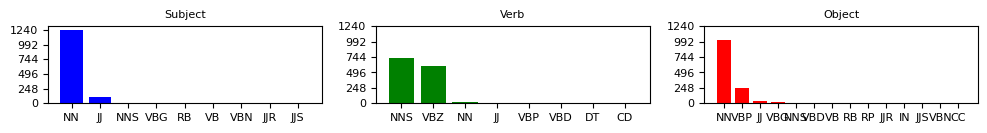

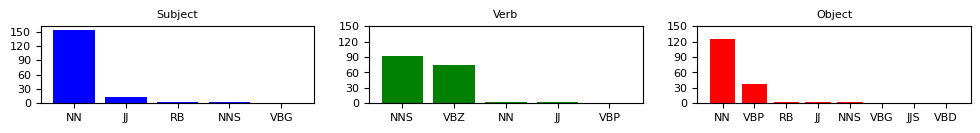

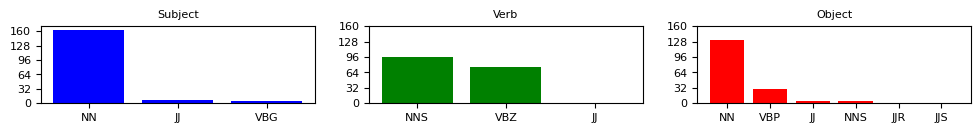

In [12]:
data_set1.plot_pos_uni_distribution()
data_set2.plot_pos_uni_distribution()
data_set3.plot_pos_uni_distribution()

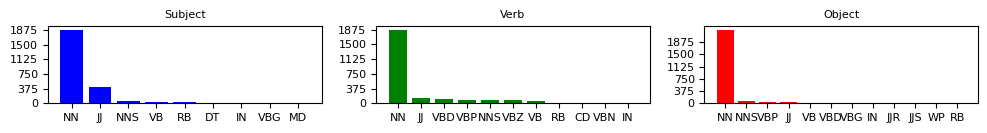

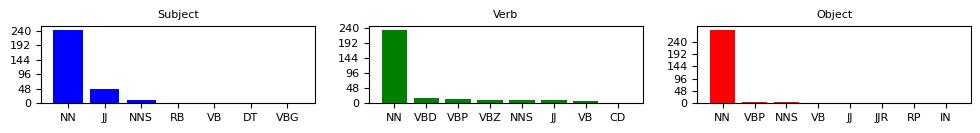

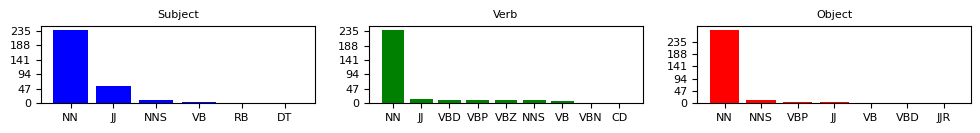

In [13]:
data_set4.plot_pos_uni_distribution()
data_set5.plot_pos_uni_distribution()
data_set6.plot_pos_uni_distribution()

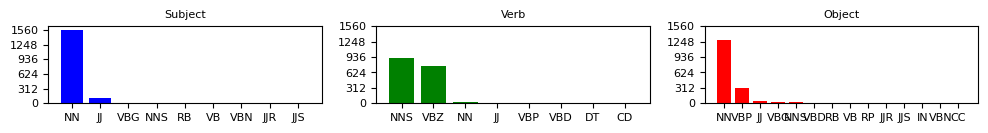

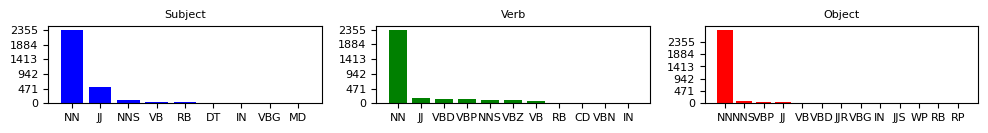

In [14]:
data_set_com1.plot_pos_uni_distribution()
data_set_com2.plot_pos_uni_distribution()

## 3.2 bigram pos

In [15]:
pos1=data_set1.pos_bigrams_counts
pos2=data_set2.pos_bigrams_counts
pos3=data_set3.pos_bigrams_counts
pos4=data_set4.pos_bigrams_counts
pos5=data_set5.pos_bigrams_counts
pos6=data_set6.pos_bigrams_counts
pos_com1=data_set_com1.pos_bigrams_counts
pos_com2=data_set_com2.pos_bigrams_counts

In [16]:
print(pos1)

{'NN NNS': 630, 'NN VBZ': 582, 'VBZ NN': 529, 'NNS NN': 452, 'NNS VBP': 247, 'JJ NNS': 84, 'NN NN': 42, 'VBZ JJ': 31, 'NNS VBG': 14, 'NNS VBD': 14, 'JJ VBZ': 13, 'VBZ NNS': 12, 'JJ NN': 10, 'VBG NNS': 10, 'NNS JJ': 8, 'RB VBZ': 8, 'NN JJ': 6, 'VBZ VBG': 6, 'VBP NN': 6, 'VBZ RB': 6, 'VBZ VB': 5, 'VBZ VBP': 5, 'NNS VB': 5, 'VBZ RP': 3, 'VB NNS': 3, 'VBD NN': 3, 'VBN NNS': 3, 'VBZ JJR': 3, 'RB NNS': 3, 'NNS RB': 3, 'NNS NNS': 2, 'NN DT': 2, 'DT NN': 2, 'NNS IN': 2, 'NN CD': 2, 'CD NN': 2, 'NN VBP': 2, 'VBZ JJS': 2, 'JJ JJ': 1, 'NNS RP': 1, 'NNS VBZ': 1, 'JJR NNS': 1, 'VBZ VBD': 1, 'VBG VBZ': 1, 'VBD VBG': 1, 'VBZ VBN': 1, 'JJS NNS': 1, 'VBZ CC': 1}


In [17]:
#draw the dotted line graph for pos bigram statistics
def plot_bigram_n_distribution(pos1,pos2,pos3,pos_com1,n):
    pos_com1_ten=list(pos_com1.keys())[:n]
    def get_v(source,target):
        v=[]
        for i in target:
            if i in source:
                v.append(source[i])
            else:
                v.append(0)
        return v

    com_data = {
        'total': get_v(pos_com1,pos_com1_ten),
        'train': get_v(pos1,pos_com1_ten),
        'dev': get_v(pos2,pos_com1_ten),
        'test': get_v(pos3,pos_com1_ten),
    }
    labels = [str(i) for i in range(1, 11)]  # Assuming the bigrams are labeled from 1 to 10

    fig, ax = plt.subplots(figsize=( 6, 3))
    x = range(len(labels))

    for split, counts in com_data.items():
        ax.plot(
            x,
            counts,
            marker='o',
            linestyle='--',
            label=split
        )

    ax.set_xticks(x)
    ax.set_xticklabels(pos_com1_ten, rotation=45, ha="right")
    ax.set_xlabel('Bigram')
    ax.set_ylabel('Count')
    ax.set_title('Bigram Distribution')
    ax.legend()

    plt.tight_layout()
    plt.show()


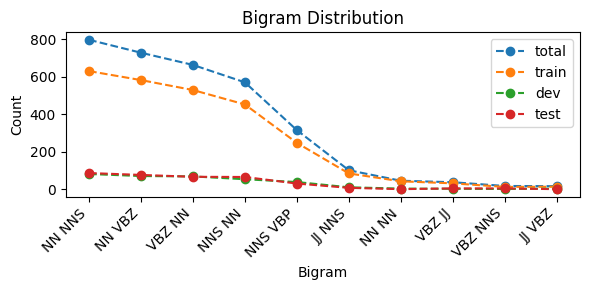

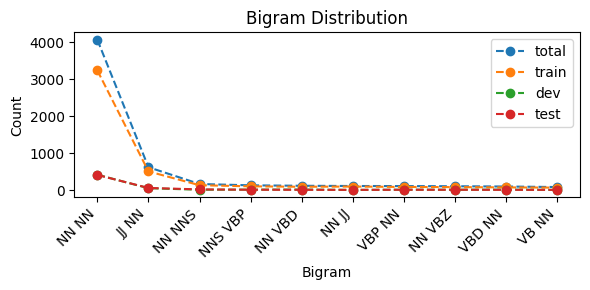

In [18]:
plot_bigram_n_distribution(pos1,pos2,pos3,pos_com1,10)
plot_bigram_n_distribution(pos4,pos5,pos6,pos_com2,10)

## 4. abstractness  
Highly abstract a,  mid-range m, highly concrete c. 

In [19]:
from data_analysis_pap_abstractness import Abstractness_analysis

In [20]:
# \pap\raw-annotations\dataset.tsv
current_dir =os.path.realpath(".")
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
print(parent_dir)

filepath=os.path.abspath(os.path.join(parent_dir,'Data/pap/raw-annotations/dataset.tsv'))
print(filepath)

pap_filter_set=Abstractness_analysis(filepath)

/home/linux1/BOX/modeling23/pap_Analysis_and_Model
/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Data/pap/raw-annotations/dataset.tsv
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag


In [21]:
# print(pap_filter_set.ab_mapping)
# print(pap_filter_set.abstractness_counts)
# print(pap_filter_set.content)
# print(pap_filter_set.count_abstract_uni())
print(pap_filter_set.count_ab_bigrams())

get all data abstractness tag
{'first_bigrams': {'a-m': 186, 'a-c': 189, 'a-a': 190, 'm-m': 184, 'm-c': 187, 'c-c': 195, 'c-m': 202, 'c-a': 201, 'm-a': 199}, 'second_bigrams': {'m-a': 180, 'c-m': 187, 'c-a': 184, 'm-m': 198, 'a-a': 195, 'c-c': 200, 'a-m': 198, 'm-c': 194, 'a-c': 197}, 'third_bigrams': {'a-a': 175, 'a-m': 195, 'm-a': 189, 'm-c': 193, 'm-m': 188, 'c-m': 200, 'c-a': 195, 'c-c': 203, 'a-c': 195}, 'total_bigrams': {'a-m': 579, 'm-a': 568, 'a-a': 560, 'a-c': 581, 'c-m': 589, 'c-a': 580, 'm-m': 570, 'm-c': 574, 'c-c': 598}}


## 4.1 unigram abstractness tag

get all data abstractness tag


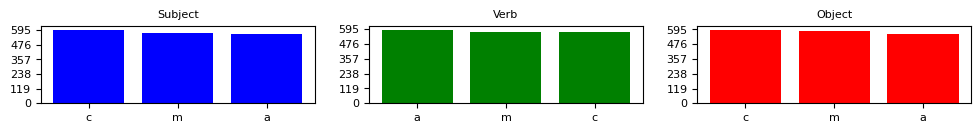

get implausible data abstractness tag


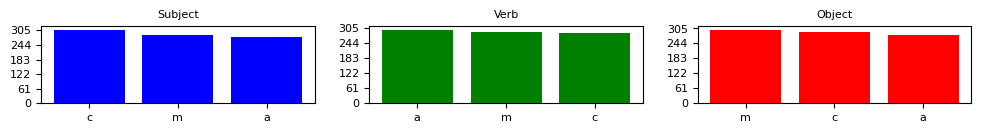

get plausible data abstractness tag


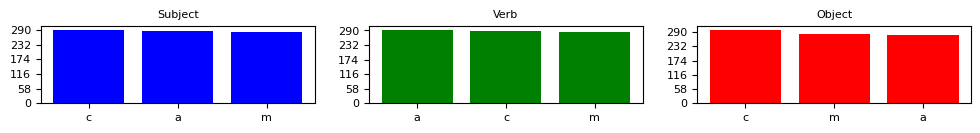

In [22]:
pap_filter_set.plot_ab_uni_distribution()
pap_filter_set.plot_ab_uni_distribution(0)
pap_filter_set.plot_ab_uni_distribution(1)

## 4.2 bigram abstractness tag

get all data abstractness tag


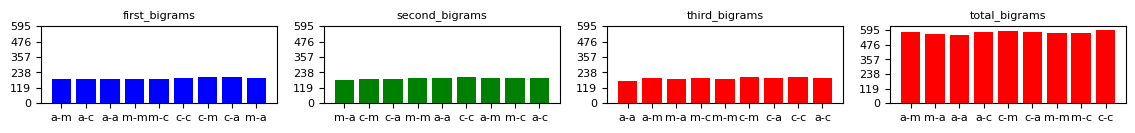

get implausible data abstractness tag


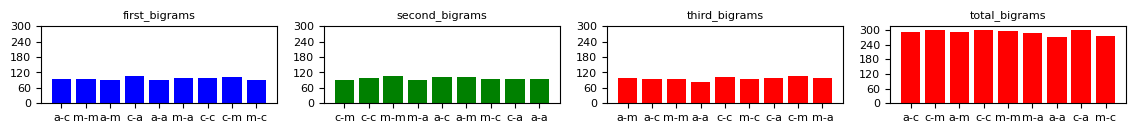

get plausible data abstractness tag


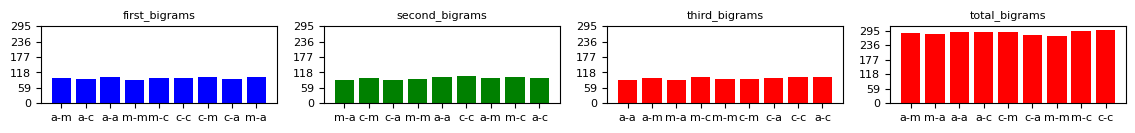

In [23]:
pap_filter_set. plot_ab_bi_distribution()
pap_filter_set.plot_ab_bi_distribution(0)
pap_filter_set.plot_ab_bi_distribution(1)

## 4.3 tokens and abstractness

get all data abstractness tag


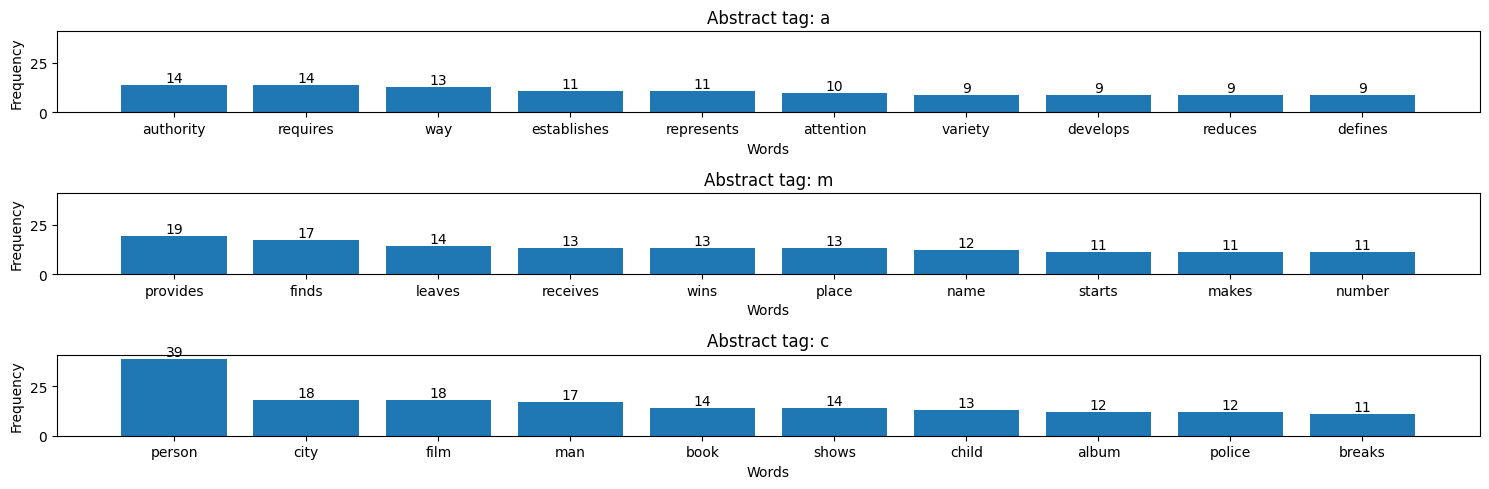

get implausible data abstractness tag


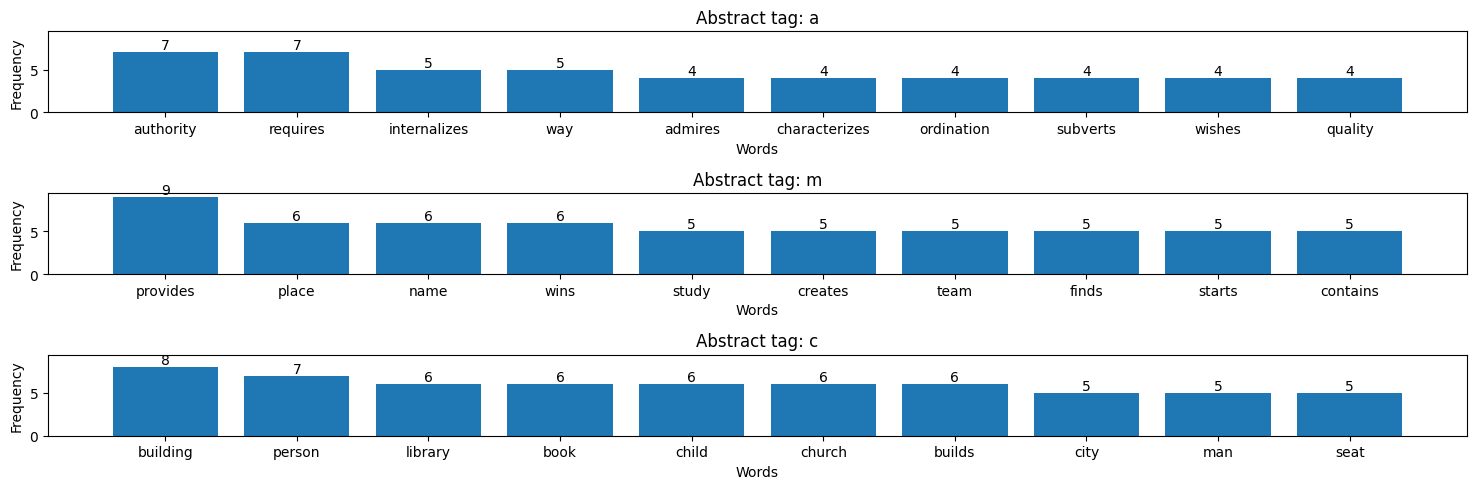

get plausible data abstractness tag


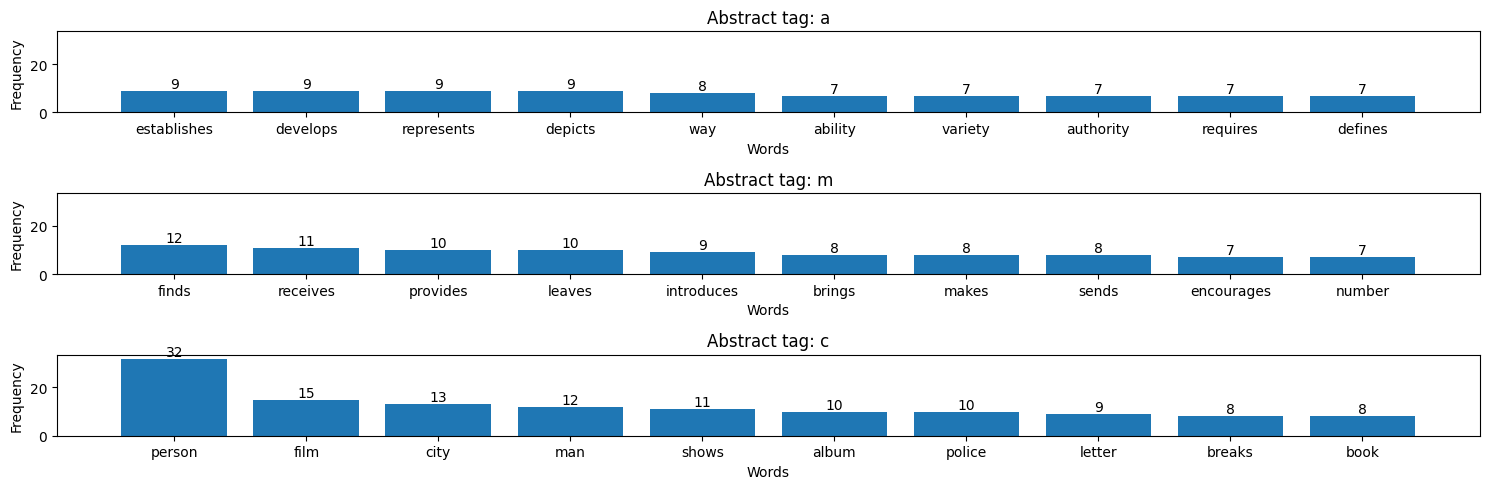

In [24]:
pap_filter_set.plot_ab_tokens_distribution()
pap_filter_set.plot_ab_tokens_distribution(0)
pap_filter_set.plot_ab_tokens_distribution(1)

get all data abstractness tag


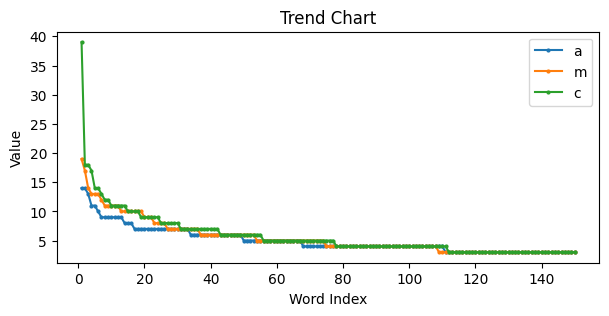

get implausible data abstractness tag


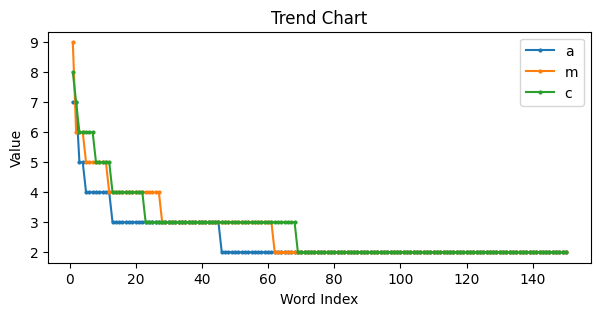

get plausible data abstractness tag


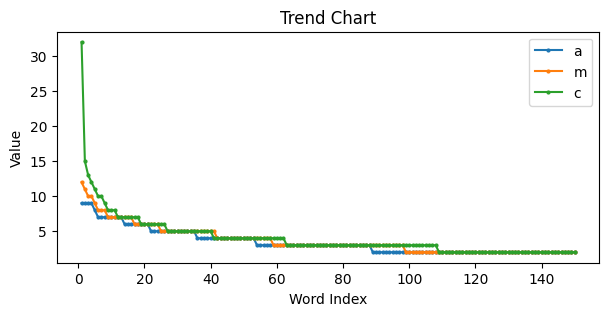

In [25]:
pap_filter_set.plot_ab_tokens_onlynumber_distribution()
pap_filter_set.plot_ab_tokens_onlynumber_distribution(0)
pap_filter_set.plot_ab_tokens_onlynumber_distribution(1)